<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise_33_PoliceKillings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__>="0.20"
import numpy as np
import pandas as pd
import random
np.random.seed(42)
import os
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [14]:
PROJECT_ROOT_DIR=" "
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_first(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=os.path.join(IMAGES_PATH,fig_id + "," + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [15]:
uploaded = files.upload()

Saving Police_encounter_killings_dataset.csv to Police_encounter_killings_dataset.csv


In [16]:
df = pd.read_csv("Police_encounter_killings_dataset.csv")
selected_columns = ['City','State']
df.drop(columns = selected_columns, inplace=True)
df.head()

,DateTime,Officer Gender,Officer Race,Police Service(years),Subject Gender,Subject Race,Subject Age,Subject Weapon,Fatal,On-duty,body_camera
0,03/21/2005 06:28:00 PM,Male,Hinduism,20,Male,Sikhism,29,Yes,Yes,Yes,No
1,04/29/2005 03:30:00 AM,Male,Hinduism,5,Male,Hinduism,36,No,Yes,Yes,No
2,06/20/2005 11:30:00 AM,Male,Hinduism,15,Male,Hinduism,53,Yes,Yes,Yes,No
3,06/20/2005 12:30:00 PM,Male,Hinduism,18,Male,Hinduism,53,Yes,Yes,Yes,No
4,07/08/2005 01:48:00 PM,Male,Hinduism,4,Male,Islam,48,Yes,No,Yes,Yes


In [17]:
le = LabelEncoder()
OfficerGender_mapping = {
    'F':'Female',
    'Female':'Female',
    'M':'Male',
    'Male':'Male'
}
df['Officer Gender'] = df['Officer Gender'].map(OfficerGender_mapping)
df = df[df['Subject Gender'] != 'Unknown']
df['Date'] = pd.to_datetime(df['DateTime'])
df = df.drop('DateTime', axis = 1)
df['OfficerGender_LE'] = le.fit_transform(df['Officer Gender'])
df['OfficerRace_LE'] = le.fit_transform(df['Officer Race'])
df['SubjectGender_LE'] = le.fit_transform(df['Subject Gender'])
df['SubjectRace_LE'] = le.fit_transform(df['Subject Race'])
df['SubjectWeapon_LE'] = le.fit_transform(df['Subject Weapon'])
df['BodyCamera_LE'] = le.fit_transform(df['body_camera'])
df['On-duty_LE'] = le.fit_transform(df['On-duty'])
df['Fatal_LE'] = le.fit_transform(df['Fatal'])

df.head()



,Officer Gender,Officer Race,Police Service(years),Subject Gender,Subject Race,Subject Age,Subject Weapon,Fatal,On-duty,body_camera,Date,OfficerGender_LE,OfficerRace_LE,SubjectGender_LE,SubjectRace_LE,SubjectWeapon_LE,BodyCamera_LE,On-duty_LE,Fatal_LE
0,Male,Hinduism,20,Male,Sikhism,29,Yes,Yes,Yes,No,2005-03-21 18:28:00,1,2,1,5,1,0,1,1
1,Male,Hinduism,5,Male,Hinduism,36,No,Yes,Yes,No,2005-04-29 03:30:00,1,2,1,2,0,0,1,1
2,Male,Hinduism,15,Male,Hinduism,53,Yes,Yes,Yes,No,2005-06-20 11:30:00,1,2,1,2,1,0,1,1
3,Male,Hinduism,18,Male,Hinduism,53,Yes,Yes,Yes,No,2005-06-20 12:30:00,1,2,1,2,1,0,1,1
4,Male,Hinduism,4,Male,Islam,48,Yes,No,Yes,Yes,2005-07-08 13:48:00,1,2,1,3,1,1,1,0


In [18]:
selected_columns = ['Officer Gender','Officer Race','Subject Gender','Subject Race','Subject Weapon','Fatal','On-duty','body_camera']
df1 = df.drop(columns = selected_columns)
df1.head()

,Police Service(years),Subject Age,Date,OfficerGender_LE,OfficerRace_LE,SubjectGender_LE,SubjectRace_LE,SubjectWeapon_LE,BodyCamera_LE,On-duty_LE,Fatal_LE
0,20,29,2005-03-21 18:28:00,1,2,1,5,1,0,1,1
1,5,36,2005-04-29 03:30:00,1,2,1,2,0,0,1,1
2,15,53,2005-06-20 11:30:00,1,2,1,2,1,0,1,1
3,18,53,2005-06-20 12:30:00,1,2,1,2,1,0,1,1
4,4,48,2005-07-08 13:48:00,1,2,1,3,1,1,1,0


In [19]:
print(df['OfficerRace_LE'].value_counts())
print(df['SubjectRace_LE'].value_counts())


2    146
1     10
5      9
3      9
4      6
0      5
Name: OfficerRace_LE, dtype: int64
2    84
3    69
5    14
4    11
0     4
1     3
Name: SubjectRace_LE, dtype: int64


In [20]:
df.describe()

,Police Service(years),Subject Age,OfficerGender_LE,OfficerRace_LE,SubjectGender_LE,SubjectRace_LE,SubjectWeapon_LE,BodyCamera_LE,On-duty_LE,Fatal_LE
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,9.859459,37.800000,0.897297,2.151351,0.913514,2.659459,0.859459,0.172973,0.983784,0.540541
std,7.436085,20.484565,0.304394,0.871537,0.281844,0.982305,0.348490,0.379250,0.126649,0.499706
min,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,24.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,7.000000,35.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,15.000000,44.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
max,38.000000,118.000000,1.000000,5.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
print(df.isnull().sum())
print(df.dtypes)


Officer Gender           0
Officer Race             0
Police Service(years)    0
Subject Gender           0
Subject Race             0
Subject Age              0
Subject Weapon           0
Fatal                    0
On-duty                  0
body_camera              0
Date                     0
OfficerGender_LE         0
OfficerRace_LE           0
SubjectGender_LE         0
SubjectRace_LE           0
SubjectWeapon_LE         0
BodyCamera_LE            0
On-duty_LE               0
Fatal_LE                 0
dtype: int64
Officer Gender                   object
Officer Race                     object
Police Service(years)             int64
Subject Gender                   object
Subject Race                     object
Subject Age                       int64
Subject Weapon                   object
Fatal                            object
On-duty                          object
body_camera                      object
Date                     datetime64[ns]
OfficerGender_LE                  

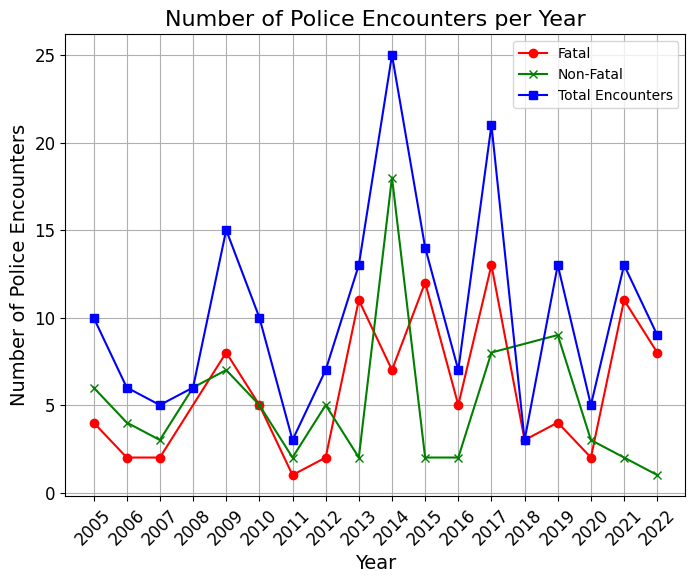

In [90]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
fatal_data = df[df['Fatal_LE'] == 1]
non_fatal_data = df[df['Fatal_LE'] == 0]
fatalities_per_year = fatal_data.groupby('year').size()
encounters_per_year = df.groupby('year').size()
non_fatalities_per_year = non_fatal_data.groupby('year').size()
plt.figure(figsize=(8, 6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker='o', color = 'red', label = 'Fatal')
plt.plot(non_fatalities_per_year.index, non_fatalities_per_year.values, marker='x', color = 'green', label = 'Non-Fatal')
plt.plot(encounters_per_year.index, encounters_per_year.values, marker='s', color = 'blue', label = 'Total Encounters')
plt.title('Number of Police Encounters per Year', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Number of Police Encounters')
x_tick_range = range(min(encounters_per_year.index), max(encounters_per_year.index) + 1, 1)
plt.xticks(x_tick_range, rotation = 45)
plt.grid(True)
plt.legend()
plt.show()


In [23]:
race_counts_fatal = fatal_data['Subject Race'].value_counts()
race_counts_non_fatal = non_fatal_data['Subject Race'].value_counts()

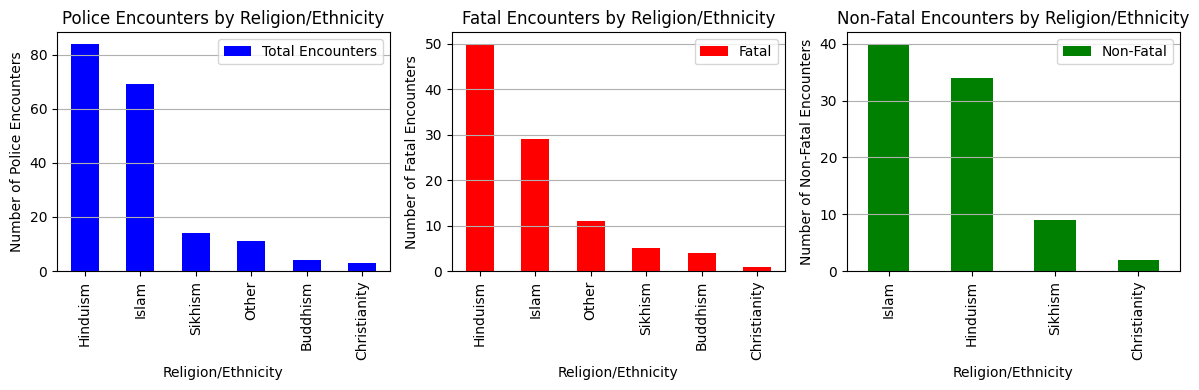

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
df['Subject Race'].value_counts().plot(kind='bar', color = 'blue', label = 'Total Encounters', fontsize=10)
plt.title('Police Encounters by Religion/Ethnicity')
plt.xlabel('Religion/Ethnicity', fontsize=10)
plt.ylabel('Number of Police Encounters', fontsize=10)
plt.grid(axis='y')
plt.legend()

plt.subplot(132)
race_counts_fatal.plot(kind='bar', color='red', label = 'Fatal', fontsize=10)
plt.title('Fatal Encounters by Religion/Ethnicity')
plt.xlabel('Religion/Ethnicity', fontsize=10)
plt.ylabel('Number of Fatal Encounters', fontsize=10)
plt.grid(axis='y')
plt.legend()

plt.subplot(133)
race_counts_non_fatal.plot(kind='bar', color='green', label='Non-Fatal', fontsize=10)
plt.title('Non-Fatal Encounters by Religion/Ethnicity')
plt.xlabel('Religion/Ethnicity', fontsize=10)
plt.ylabel('Number of Non-Fatal Encounters', fontsize=10)
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.show()



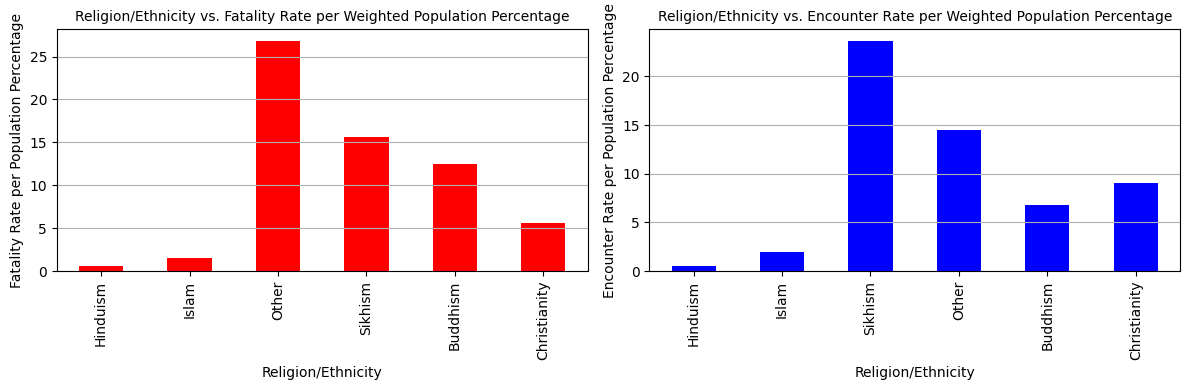

Conclusions:
---------------
1. The previous few graphs show the relation between Religion/Ethnicity and Police Encounters either Fatal or Non-Fatal
2. The Fatality Rate per Race in the given timeframe is: 
 Hinduism        50.0
Islam           29.0
Other           11.0
Sikhism          5.0
Buddhism         4.0
Christianity     1.0
Name: Subject Race, dtype: float64

3. The Encounter Rate per Race in the given timeframe is: 
 Hinduism        45.405405
Islam           37.297297
Sikhism          7.567568
Other            5.945946
Buddhism         2.162162
Christianity     1.621622
Name: Subject Race, dtype: float64

4. It is obvious that Sikhs have the highest Weighted Fatality rate per Population percentage, not considering 'Others'

5. In terms of numbers, Hindus and Muslims have faced the highest number of encounters both fatal and non-fatal in the given data.


In [25]:
population_data_UP = {
    'Hinduism': 79.73,
    'Islam': 19.26,
    'Christianity': 0.18,
    'Sikhism': 0.32,
    'Buddhism':0.32,
    'Other':0.41
}

race_fatality_rate = fatal_data['Subject Race'].value_counts(normalize=True) * 100
fatality_rate_per_population = race_fatality_rate / race_fatality_rate.index.map(population_data_UP)

race_encounters_rate = df['Subject Race'].value_counts(normalize = True) * 100
encounter_rate_per_population = race_encounters_rate / race_encounters_rate.index.map(population_data_UP)

plt.figure(figsize=(12, 4))

plt.subplot(121)
fatality_rate_per_population.plot(kind='bar', color='red', fontsize=10)
plt.title('Religion/Ethnicity vs. Fatality Rate per Weighted Population Percentage', fontsize=10)
plt.xlabel('Religion/Ethnicity',fontsize=10)
plt.ylabel('Fatality Rate per Population Percentage',fontsize=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.subplot(122)
encounter_rate_per_population.plot(kind='bar', color = 'blue', fontsize=10)
plt.title('Religion/Ethnicity vs. Encounter Rate per Weighted Population Percentage', fontsize=10)
plt.xlabel('Religion/Ethnicity', fontsize=10)
plt.ylabel('Encounter Rate per Population Percentage', fontsize=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

print("Conclusions:")
print("---------------")
print("1. The previous few graphs show the relation between Religion/Ethnicity and Police Encounters either Fatal or Non-Fatal")
print("2. The Fatality Rate per Race in the given timeframe is: \n", race_fatality_rate)
print("\n3. The Encounter Rate per Race in the given timeframe is: \n", race_encounters_rate)
print("\n4. It is obvious that Sikhs have the highest Weighted Fatality rate per Population percentage, not considering 'Others'")
print("\n5. In terms of numbers, Hindus and Muslims have faced the highest number of encounters both fatal and non-fatal in the given data.")

In [26]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['age_group'] = pd.cut(df['Subject Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()
fatal_data = df[df['Fatal_LE'] == 1]

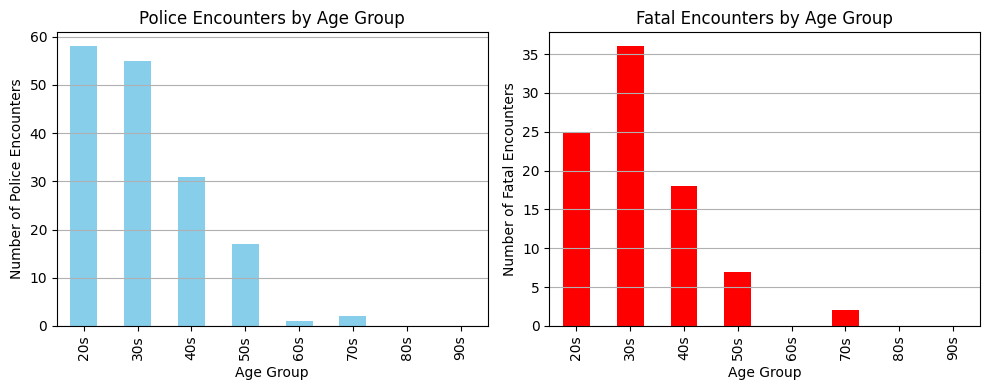

In [27]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
age_group_counts.plot(kind='bar', color='skyblue', fontsize=10)
plt.title('Police Encounters by Age Group')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Police Encounters', fontsize=10)
plt.grid(axis='y')

plt.subplot(122)
fatal_data['age_group'].value_counts().sort_index().plot(kind='bar', color='red', fontsize=10)
plt.title('Fatal Encounters by Age Group')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Fatal Encounters', fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

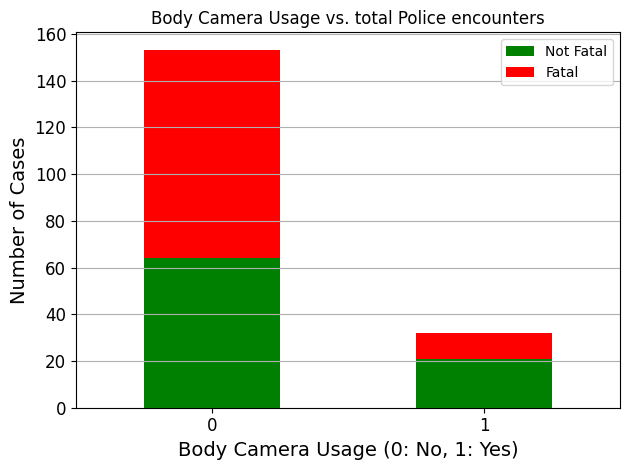

Conclusions:
---------------
1. The graph shows body camera usage for all police encounters both Fatal and Non-Fatal.
2. The majority of fatal encounters seem to occur when body cameras are not used.
3. Body camera usage in fatal encounters without cameras: 89.00%
4. Body camera usage in fatal encounters with cameras: 11.00%
5. Body camera usage in all Police encounters without camera: 82.70%
5. Body camera usage in all Police encounters with camera: 17.30%


In [28]:
total_fatal_cases = fatal_data.shape[0]
total_encounter_cases = df.shape[0]
body_camera_usage_fatality = fatal_data['BodyCamera_LE'].value_counts()
body_camera_usage_encounter = df['BodyCamera_LE'].value_counts()
camera_usage_percentage_no_camera_fatality = (body_camera_usage_fatality[0] / total_fatal_cases) * 100
camera_usage_percentage_with_camera_fatality = (body_camera_usage_fatality[1] / total_fatal_cases) * 100
camera_usage_percentage_no_camera_encounter = (body_camera_usage_encounter[0] / total_encounter_cases) * 100
camera_usage_percentage_with_camera_encounter = (body_camera_usage_encounter[1] / total_encounter_cases) * 100

plt.figure(figsize=(6,4))

body_camera_count = df.groupby('BodyCamera_LE')['Fatal_LE'].value_counts().unstack()
plt.figure(figsize = (6,4))
body_camera_count.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Body Camera Usage vs. total Police encounters')
plt.xlabel('Body Camera Usage (0: No, 1: Yes)')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(['Not Fatal', 'Fatal'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

print("Conclusions:")
print("---------------")
print("1. The graph shows body camera usage for all police encounters both Fatal and Non-Fatal.")
print("2. The majority of fatal encounters seem to occur when body cameras are not used.")
print(f"3. Body camera usage in fatal encounters without cameras: {camera_usage_percentage_no_camera_fatality:.2f}%")
print(f"4. Body camera usage in fatal encounters with cameras: {camera_usage_percentage_with_camera_fatality:.2f}%")
print(f"5. Body camera usage in all Police encounters without camera: {camera_usage_percentage_no_camera_encounter:.2f}%")
print(f"5. Body camera usage in all Police encounters with camera: {camera_usage_percentage_with_camera_encounter:.2f}%")




In [29]:
corr=df1.corr()
print(corr)

                       Police Service(years)  Subject Age  OfficerGender_LE  \
Police Service(years)               1.000000     0.114879          0.048813   
Subject Age                         0.114879     1.000000         -0.043406   
OfficerGender_LE                    0.048813    -0.043406          1.000000   
OfficerRace_LE                      0.015040     0.009315          0.017939   
SubjectGender_LE                    0.170504    -0.022780          0.149297   
SubjectRace_LE                      0.012013     0.060338         -0.044900   
SubjectWeapon_LE                    0.120268     0.130794          0.119361   
BodyCamera_LE                      -0.184047     0.033859         -0.174826   
On-duty_LE                         -0.031287    -0.001257         -0.043436   
Fatal_LE                           -0.008696     0.027078          0.188306   

                       OfficerRace_LE  SubjectGender_LE  SubjectRace_LE  \
Police Service(years)        0.015040          0.170504

<ipython-input-29-85dfbc7e206c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df1.corr()


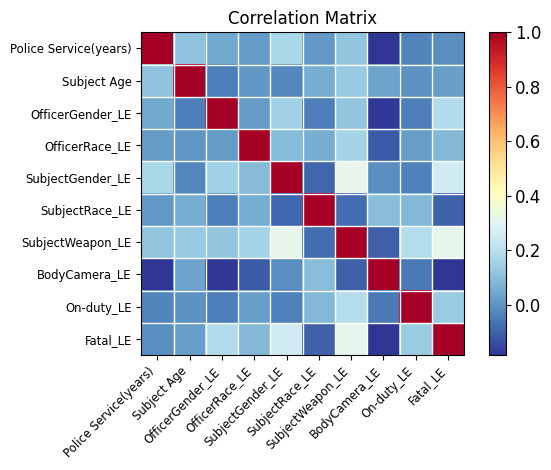

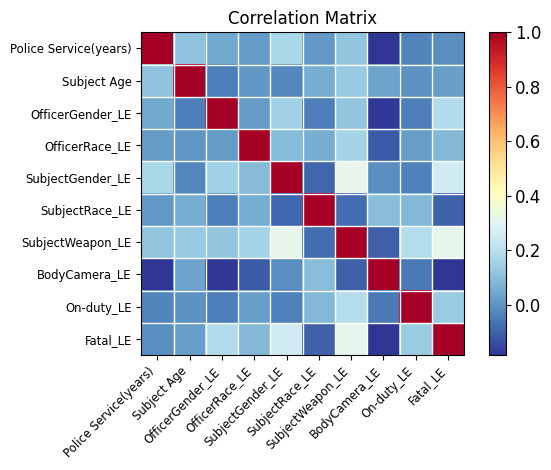

In [30]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

Text(0.5, 0.98, 'Pair Plot')

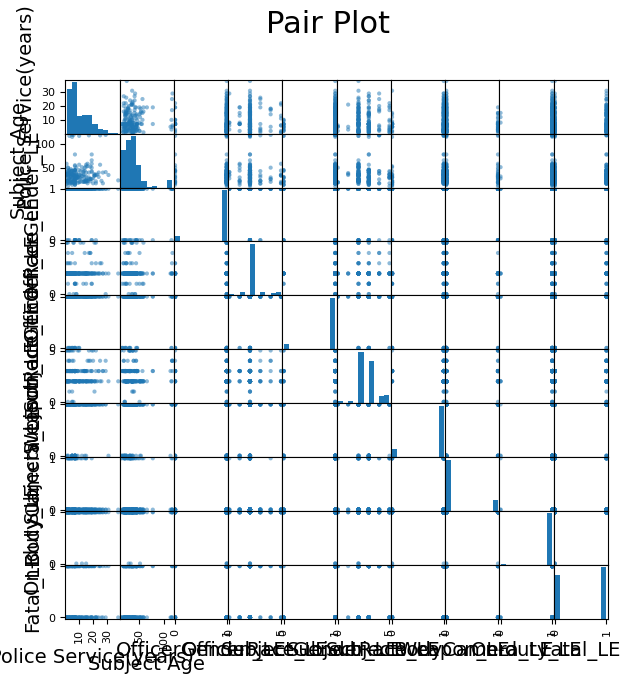

In [31]:
scatter_matrix(df1, figsize=(7,7))
plt.suptitle("Pair Plot", fontsize=22)

In [167]:
df1['year'] = df1['Date'].dt.year
df1['month'] = df1['Date'].dt.month
data = df1.drop('Date', axis=1)
data.head()

,Police Service(years),Subject Age,OfficerGender_LE,OfficerRace_LE,SubjectGender_LE,SubjectRace_LE,SubjectWeapon_LE,BodyCamera_LE,On-duty_LE,Fatal_LE,year,month
0,20,29,1,2,1,5,1,0,1,1,2005,3
1,5,36,1,2,1,2,0,0,1,1,2005,4
2,15,53,1,2,1,2,1,0,1,1,2005,6
3,18,53,1,2,1,2,1,0,1,1,2005,6
4,4,48,1,2,1,3,1,1,1,0,2005,7


In [96]:
scaler = StandardScaler()

In [98]:
X = data.drop('Fatal_LE', axis=1).values
X_scaled = scaler.fit_transform(X)
y = data['Fatal_LE'].values
X_scaled.shape

(185, 11)

In [100]:
for i in range(-5,6):
  val = 10**i
  svm_clf = SVC(kernel='rbf', C=val, gamma=val)
  svm_clf.fit(X_scaled, y)
  y_pred = svm_clf.predict(X_scaled)
  print(f"Accuracy({val}): ", accuracy_score(y, y_pred))

Accuracy(1e-05):  0.5405405405405406
Accuracy(0.0001):  0.5405405405405406
Accuracy(0.001):  0.5405405405405406
Accuracy(0.01):  0.5405405405405406
Accuracy(0.1):  0.7189189189189189
Accuracy(1):  0.9837837837837838
Accuracy(10):  1.0
Accuracy(100):  1.0
Accuracy(1000):  1.0
Accuracy(10000):  1.0
Accuracy(100000):  1.0


In [157]:
svm_clf = SVC(kernel='rbf', C=10.0, gamma=0.1)
svm_clf.fit(X_scaled,y)
y_pred = svm_clf.predict(X_scaled)
print("Accuracy Score: ", accuracy_score(y, y_pred))

Accuracy Score:  0.9135135135135135


In [81]:
upload = files.upload()

Saving Police_encounter_Future_Forecast.csv to Police_encounter_Future_Forecast.csv


In [158]:
future_data = pd.read_csv("Police_encounter_Future_Forecast.csv")
future_data['Body Camera'] = le.fit_transform(future_data['Body Camera'])
future_data['Officer Gender'] = le.fit_transform(future_data['Officer Gender'])
future_data['Officer Race'] = le.fit_transform(future_data['Officer Race'])
future_data['Subject Gender'] = le.fit_transform(future_data['Subject Gender'])
future_data['Subject Race'] = le.fit_transform(future_data['Subject Race'])
future_data['Subject Weapon'] = le.fit_transform(future_data['Subject Weapon'])
future_data['On-duty'] = le.fit_transform(future_data['On-duty'])
future_data.head()

,Year,Month,Officer Gender,Officer Race,Police Service(years),Subject Gender,Subject Race,Subject Age,Subject Weapon,On-duty,Body Camera
0,2023,3,0,2,10,0,0,75,0,0,1
1,2023,4,1,2,1,1,2,34,1,1,0
2,2023,6,1,2,6,1,4,28,1,1,0
3,2023,10,1,2,1,1,4,25,1,1,1
4,2023,6,1,2,3,0,2,46,1,1,0


In [159]:
y_future_OneYear = svm_clf.predict(scaler.fit_transform(future_data))
print(y_future_OneYear)

[0 1 1 0 1 0 1 0 0 1 1 0 1 1 1]


In [160]:
filtered_data = future_data[future_data['Month'] <= 6]

In [161]:
y_future_SixMonths = svm_clf.predict(scaler.fit_transform(filtered_data))
print(y_future_SixMonths)

[0 1 1 1 1 1 1]


In [162]:
future_data1 = future_data
future_data1['Fatal'] = y_future_OneYear
future_data1.head()

,Year,Month,Officer Gender,Officer Race,Police Service(years),Subject Gender,Subject Race,Subject Age,Subject Weapon,On-duty,Body Camera,Fatal
0,2023,3,0,2,10,0,0,75,0,0,1,0
1,2023,4,1,2,1,1,2,34,1,1,0,1
2,2023,6,1,2,6,1,4,28,1,1,0,1
3,2023,10,1,2,1,1,4,25,1,1,1,0
4,2023,6,1,2,3,0,2,46,1,1,0,1


In [163]:
fatal_data_future = future_data1[future_data1['Fatal'] == 1]
non_fatal_data_future = future_data1[future_data1['Fatal'] == 0]
fatalities_per_year_future = fatal_data_future.groupby('Year').size()
fatalities_per_month_future = fatal_data_future.groupby('Month').size()
non_fatalities_per_year_future = non_fatal_data_future.groupby('Year').size()
non_fatalities_per_month_future = non_fatal_data_future.groupby('Month').size()
encounters_per_year_future = future_data1.groupby('Year').size()
encounters_per_month_future = future_data1.groupby('Month').size()



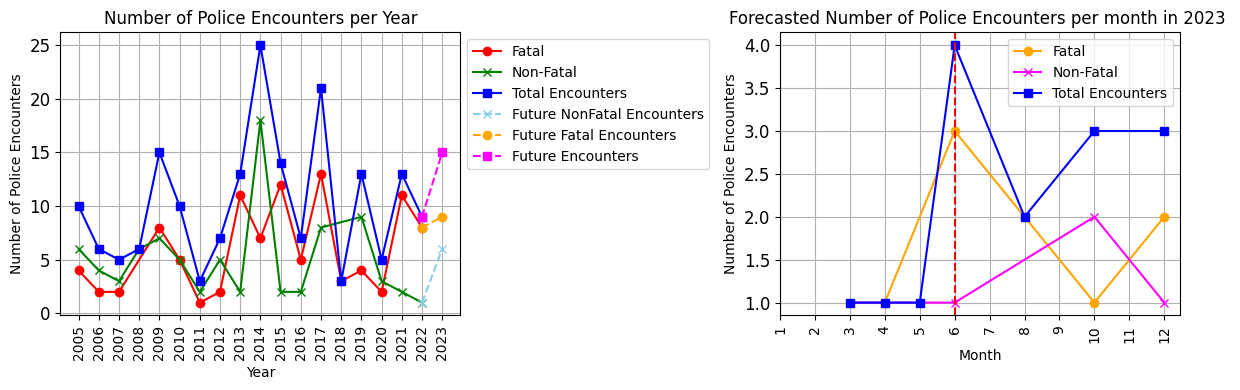

In [166]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker='o', color = 'red', label = 'Fatal')
plt.plot(non_fatalities_per_year.index, non_fatalities_per_year.values, marker='x', color = 'green', label = 'Non-Fatal')
plt.plot(encounters_per_year.index, encounters_per_year.values, marker='s', color = 'blue', label = 'Total Encounters')
plt.plot([non_fatalities_per_year.index[-1], non_fatalities_per_year_future.index[0]], [non_fatalities_per_year.values[-1], non_fatalities_per_year_future.values[0]], marker='x', linestyle='--', color='skyblue', label='Future NonFatal Encounters')
plt.plot([fatalities_per_year.index[-1], fatalities_per_year_future.index[0]], [fatalities_per_year.values[-1], fatalities_per_year_future.values[0]], marker='o', linestyle='--', color='orange', label='Future Fatal Encounters')
plt.plot([encounters_per_year.index[-1], encounters_per_year_future.index[0]], [encounters_per_year.values[-1], encounters_per_year_future.values[0]], marker='s', linestyle='--', color='magenta', label='Future Encounters')
plt.title('Number of Police Encounters per Year', fontsize = 12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Police Encounters', fontsize=10)
x_tick_range = range(min(encounters_per_year.index), max(encounters_per_year_future.index) + 1, 1)
plt.xticks(x_tick_range, rotation = 90, fontsize=10)
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(122)
plt.plot(fatalities_per_month_future.index, fatalities_per_month_future.values, marker='o', color = 'orange', label = 'Fatal')
plt.plot(non_fatalities_per_month_future.index, non_fatalities_per_month_future.values, marker='x', color = 'magenta', label = 'Non-Fatal')
plt.plot(encounters_per_month_future.index, encounters_per_month_future.values, marker='s', color = 'blue', label = 'Total Encounters')
plt.axvline(x=6, color='red', linestyle='--')
plt.title('Forecasted Number of Police Encounters per month in 2023 ', fontsize = 12)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Police Encounters', fontsize=10)
x_tick_range = range(1,13,1)
plt.xticks(x_tick_range, rotation = 90, fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()